Прежде чем сдать это задание, убедитесь, что все работает должным образом. 
Для этого следует "выполнить всё" в документе.

Убедитесь, что вы заполнили все места, где написано «ВАШ КОД ЗДЕСЬ» или «ВАШ ОТВЕТ ЗДЕСЬ».

In [1]:
NAME = "Asya Aynbund"
COLLABORATORS = ""

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import interpolate
from scipy import optimize
plt.rcParams['figure.dpi'] = 150

#  Вводное задание. 

Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval. 

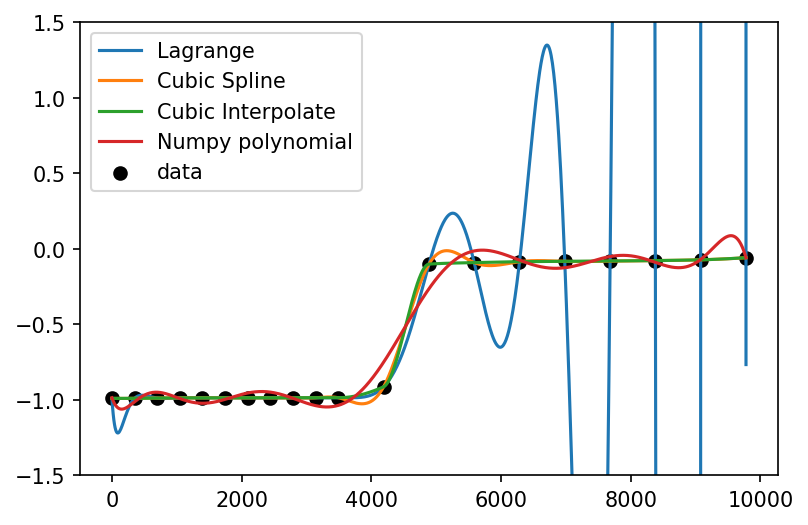

In [8]:
data = np.load('data_7_1.npz')

x1 = data['x1']
y1 = data['y1']
plt.scatter(x1, y1, label='data', c='black')

grid = np.linspace(min(x1), max(x1), 1000)
lagrange = interpolate.lagrange(x1, y1)
cubic_spl = interpolate.CubicSpline(x1, y1)
cubic_interp = interpolate.PchipInterpolator(x1, y1)
numpy_poly = np.polyfit(x1, y1, 12)

ax = plt.gca()
ax.set_ylim([-1.5, 1.5])
plt.plot(grid, lagrange(grid), label='Lagrange', )
plt.plot(grid, cubic_spl(grid), label='Cubic Spline', )
plt.plot(grid, cubic_interp(grid), label='Cubic Interpolate', )
plt.plot(grid, np.polyval(numpy_poly, grid), label='Numpy polynomial', )
plt.legend()

---

# Задача 1.  Интерполяция полиномом Лагранжа.

Напишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [9]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = (self.xk).shape[0] 
        ones = np.ones(n)
        for i in range(n):
            for j in range(n):
                if i != j:
                    ones[i] *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
        return np.sum(ones * self.yk)
        
        raise NotImplementedError()

In [10]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

## Задача 2. Феномен Рунге

Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике. 

In [11]:
# YOUR CODE AND COMMENTS HERE

Допишите функцию, которая возвращает узлы Чебышева. 

In [12]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [13]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5) 

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

NotImplementedError: 

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


In [14]:
# YOUR CODE AND COMMENTS HERE

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

# Задача 3. Интерполяция полиномами Чебышева.

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

# Задача 4.  Интерполяция многочленами и дробями.

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

In [15]:
def inter1(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1 * x + p2 * x**2 + p3 * x**3 + p4 * x**4 + p5 * x**5
def inter2(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1 * x + p2 * x**2 + p3 * x**3) / (1 + q1 * x + q2 * x**2)

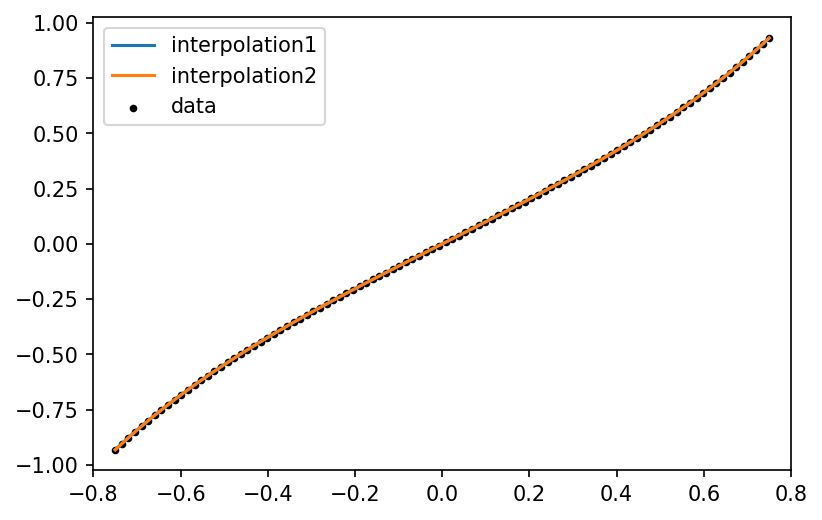

In [52]:
x4 = data['x4']
y4 = data['y4']

popt1, _ = optimize.curve_fit(inter1, x4, y4)
popt2, _ = optimize.curve_fit(inter2, x4, y4)

plt.scatter(x4, y4, s = 7, label='data', c='black') 
plt.plot(x4, inter1(x4, *popt1), label='interpolation1')
plt.plot(x4, inter2(x4, *popt2), label='interpolation2')
ax = plt.gca()
ax.set_xlim(-0.8, 0.8)
plt.legend()

Описание примерно одинаково

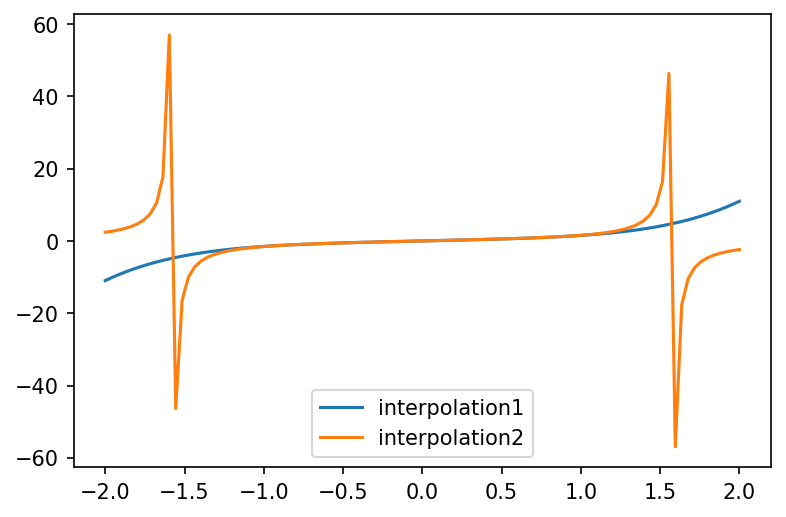

In [57]:
grid = np.linspace(-2, 2, 100)
plt.plot(grid, inter1(grid, *popt1), label='interpolation1')
plt.plot(grid, inter2(grid, *popt2), label='interpolation2')
plt.legend()

На б**о**льшем диапазоне понятно, что первая функция приближает лучше.

#  Задача 5.  Сетка узлов Чебышева.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$ 

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным? 

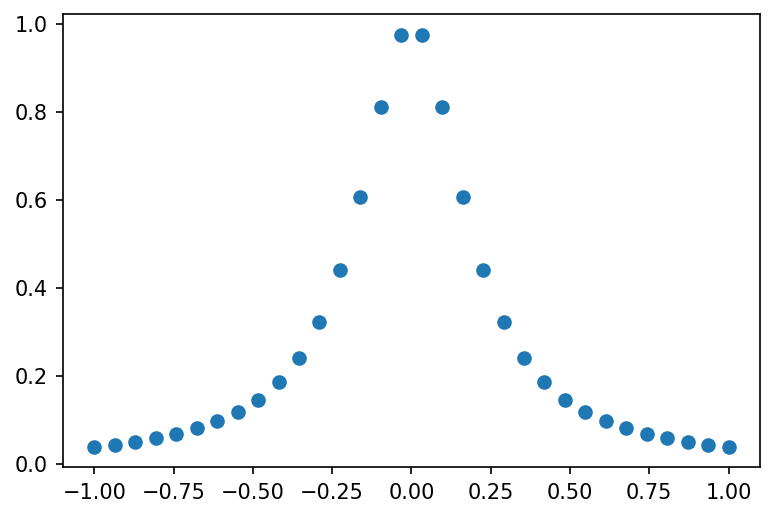

In [61]:
x5 = data['x5']
y5 = data['y5']

plt.scatter(x5, y5, label='data')

Сделаем интерполяцию Лагранжем:

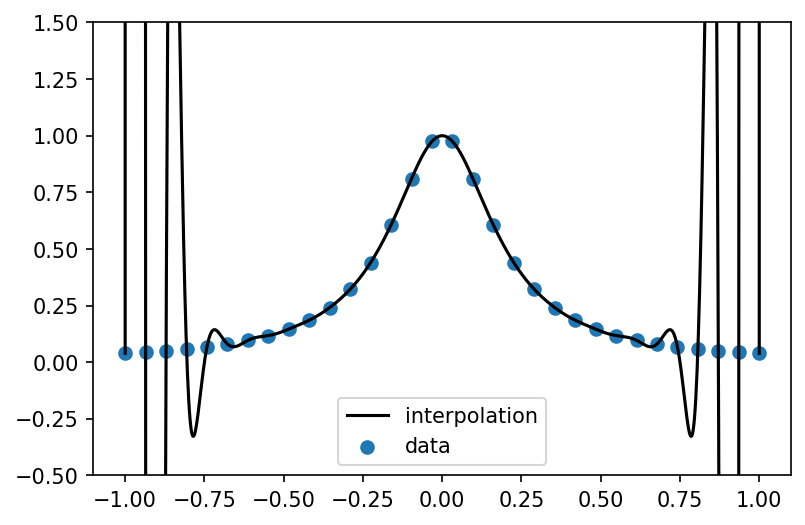

In [77]:
plt.scatter(x5, y5, label='data')
grid = np.linspace(min(x5), max(x5), 1000)
lagrange_grid = np.zeros(len(grid))
lagrange = LagrangeInterpolator(x5, y5)
for i in range(len(grid)):
    lagrange_grid[i] = lagrange(grid[i])

plt.plot(grid, lagrange_grid, label='interpolation', color='black')

ax = plt.gca()
ax.set_ylim(-0.5, 1.5)
plt.legend()

In [82]:
def g(s): 
    return (40320 * s + 6720 * s**3 + 3024 * s**5 + 1800 * s**7 + 1225 * s**9) / 53089

Теперь вместо x5 сделаем g(x5):

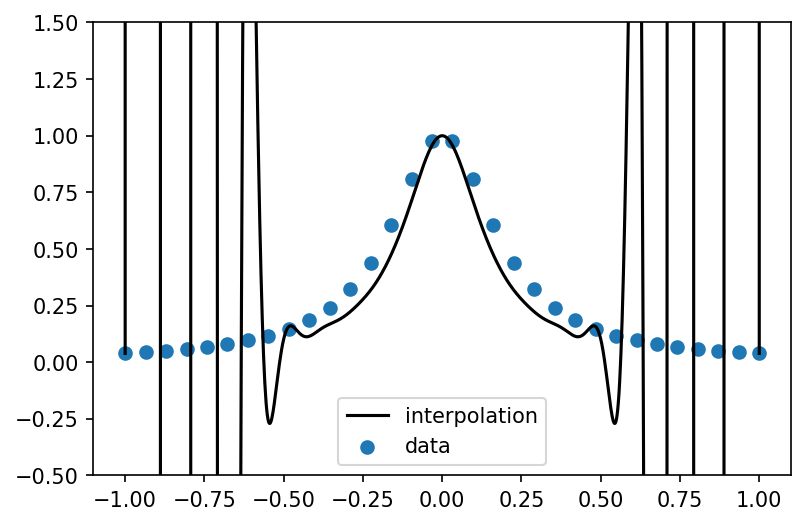

In [83]:
plt.scatter(x5, y5, label='data')
grid = np.linspace(min(x5), max(x5), 1000)
lagrange_grid = np.zeros(len(grid))
lagrange = LagrangeInterpolator(g(x5), y5)
for i in range(len(grid)):
    lagrange_grid[i] = lagrange(grid[i])

plt.plot(grid, lagrange_grid, label='interpolation', color='black')

ax = plt.gca()
ax.set_ylim(-0.5, 1.5)
plt.legend()

Получилось не сильно лучше....